In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

data = pd.read_csv('March_Madness.csv')

data['Is_32'] = data['FINISH'].apply(lambda x: 1 if x != 'R64' else 0)
winner = data[data['Is_32'] == 1]
loser = data[data['Is_32'] == 0]


def bootstrap_mean(data, n_bootstrap=10000):
    bootstrap_means = np.empty(n_bootstrap)
    for i in range(n_bootstrap):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_means[i] = np.mean(bootstrap_sample)
    return bootstrap_means

data.columns

Index(['Unnamed: 0', 'YEAR', 'TEAM', 'CONF', 'G', 'REC', 'ADJOE', 'ADJDE',
       'EFG%', 'EFGD%', 'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P%',
       '2P%D', '3P%', '3P%D', '3PR', '3PRD', 'ADJ T.', 'WAB', 'SEED', 'FINISH',
       'WINS', 'LOSSES', 'Is_32'],
      dtype='object')

### Bootstrap ADJOE

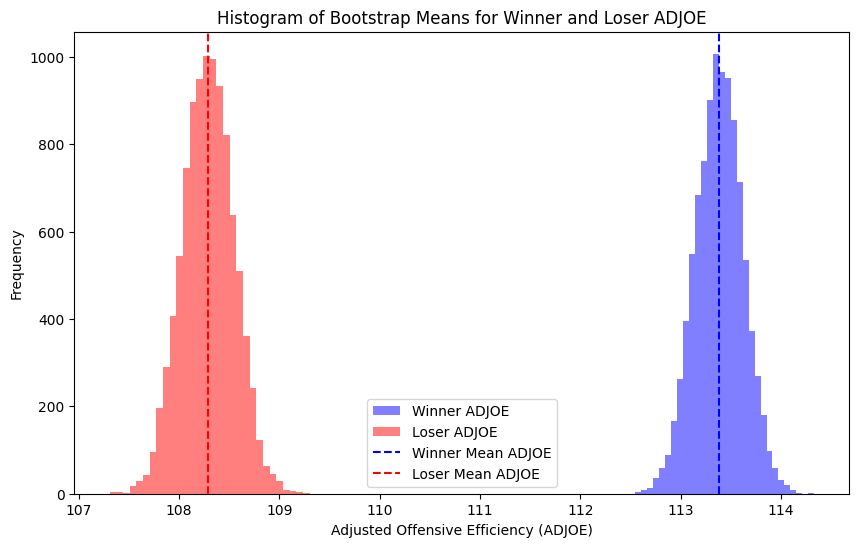

Winner ADJOE 95% CI: [112.92082812 113.84086458]
Loser ADJOE 95% CI: [107.79770833 108.781875  ]


In [61]:
# Plotting the histograms
# Bootstrap for winner and loser ADJOE
winner_means = bootstrap_mean(winner['ADJOE'])
loser_means = bootstrap_mean(loser['ADJOE'])

# Confidence intervals
winner_ci = np.percentile(winner_means, [2.5, 97.5])
loser_ci = np.percentile(loser_means, [2.5, 97.5])

plt.figure(figsize=(10, 6))
plt.hist(winner_means, bins=30, alpha=0.5, label='Winner ADJOE', color='blue')
plt.hist(loser_means, bins=30, alpha=0.5, label='Loser ADJOE', color='red')
plt.axvline(np.mean(winner_means), color='blue', linestyle='--', label='Winner Mean ADJOE')
plt.axvline(np.mean(loser_means), color='red', linestyle='--', label='Loser Mean ADJOE')
plt.title('Histogram of Bootstrap Means for Winner and Loser ADJOE')
plt.xlabel('Adjusted Offensive Efficiency (ADJOE)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print('Winner ADJOE 95% CI:', winner_ci)
print('Loser ADJOE 95% CI:', loser_ci)

### Hypothesis Testing ADJOE

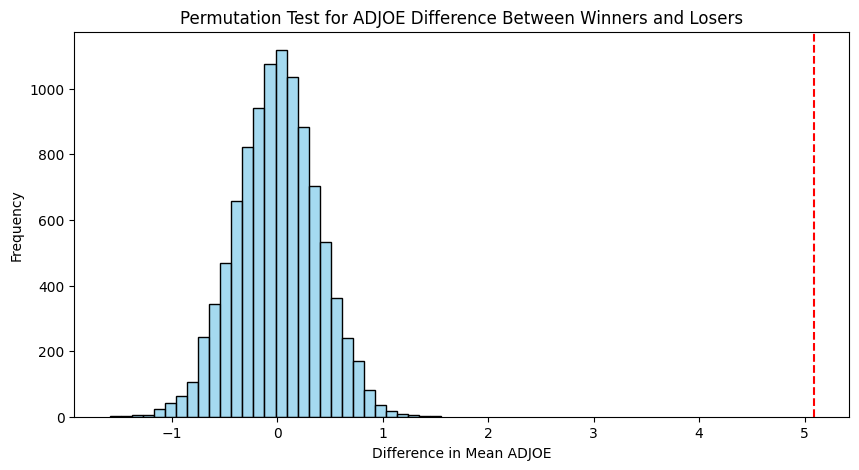

Observed difference in mean ADJOE: 5.090624999999989
P-value: 0.0


In [62]:
winners_adjoe = data[data['Is_32'] == 1]['ADJOE']
losers_adjoe = data[data['Is_32'] == 0]['ADJOE']

# Calculate the observed difference in ADJOE
observed_diff_adjoe = np.mean(winners_adjoe) - np.mean(losers_adjoe)

# Combine ADJOE values from both winners and losers for permutation
combined_adjoe = pd.concat([winners_adjoe, losers_adjoe])

# Initialize list to hold permutation differences
perm_diffs_adjoe = []

# Perform permutations
n_permutations = 10000
for _ in range(n_permutations):
    # Shuffle the combined ADJOE values
    shuffled_adjoe = combined_adjoe.sample(frac=1, replace=False).values
    
    # Split the shuffled values into two groups
    shuffled_winners_adjoe = shuffled_adjoe[:len(winners_adjoe)]
    shuffled_losers_adjoe = shuffled_adjoe[len(winners_adjoe):]
    
    # Calculate the difference in mean ADJOE for this permutation
    perm_diff_adjoE = np.mean(shuffled_winners_adjoe) - np.mean(shuffled_losers_adjoe)
    
    # Append the difference to the list
    perm_diffs_adjoe.append(perm_diff_adjoE)

# Calculate the p-value based on the observed difference
p_value_adjoe= (sum(perm_diffs_adjoe >= observed_diff_adjoe) / n_permutations)

# Plot the results
plt.figure(figsize=(10, 5))
sns.histplot(perm_diffs_adjoe, bins=30, kde=False, color='skyblue')
plt.axvline(x=observed_diff_adjoe, color='red', linestyle='--')
plt.title('Permutation Test for ADJOE Difference Between Winners and Losers')
plt.xlabel('Difference in Mean ADJOE')
plt.ylabel('Frequency')
plt.show()

# Print observed difference and p-value
print('Observed difference in mean ADJOE:', observed_diff_adjoe)
print('P-value:', p_value_adjoe)

### Bootstrap ADJDE

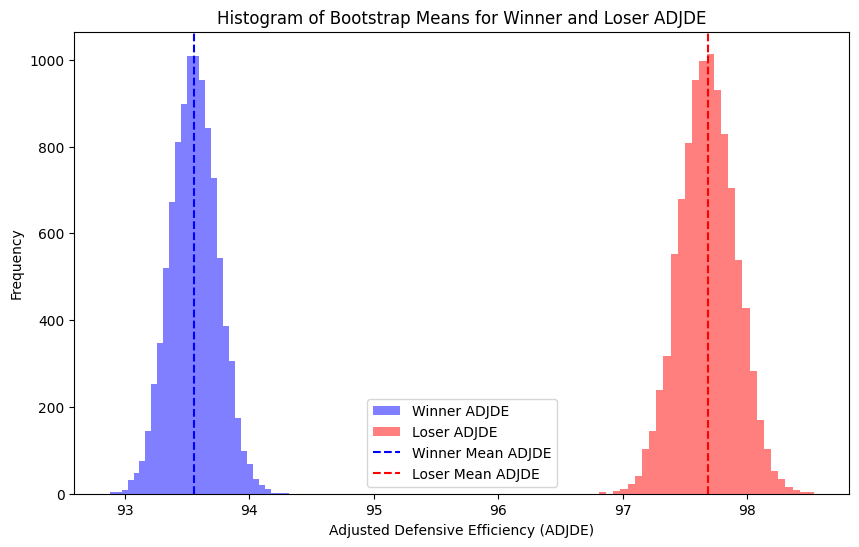

Winner ADJDE Mean CI: [93.19582813 93.92771875]
Loser ADJDE Mean CI: [97.23728125 98.12335937]


In [63]:
winner_means_adjde = bootstrap_mean(winner['ADJDE'])
loser_means_adjde = bootstrap_mean(loser['ADJDE'])

# Confidence intervals
winner_ci_adjde = np.percentile(winner_means_adjde, [2.5, 97.5])
loser_ci_adjde = np.percentile(loser_means_adjde, [2.5, 97.5])

plt.figure(figsize=(10, 6))
plt.hist(winner_means_adjde, bins=30, alpha=0.5, label='Winner ADJDE', color='blue')
plt.hist(loser_means_adjde, bins=30, alpha=0.5, label='Loser ADJDE', color='red')
plt.axvline(np.mean(winner_means_adjde), color='blue', linestyle='--', label='Winner Mean ADJDE')
plt.axvline(np.mean(loser_means_adjde), color='red', linestyle='--', label='Loser Mean ADJDE')
plt.title('Histogram of Bootstrap Means for Winner and Loser ADJDE')
plt.xlabel('Adjusted Defensive Efficiency (ADJDE)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print('Winner ADJDE Mean CI:', winner_ci_adjde)
print('Loser ADJDE Mean CI:', loser_ci_adjde)

### Hypothesis Test ADJDE

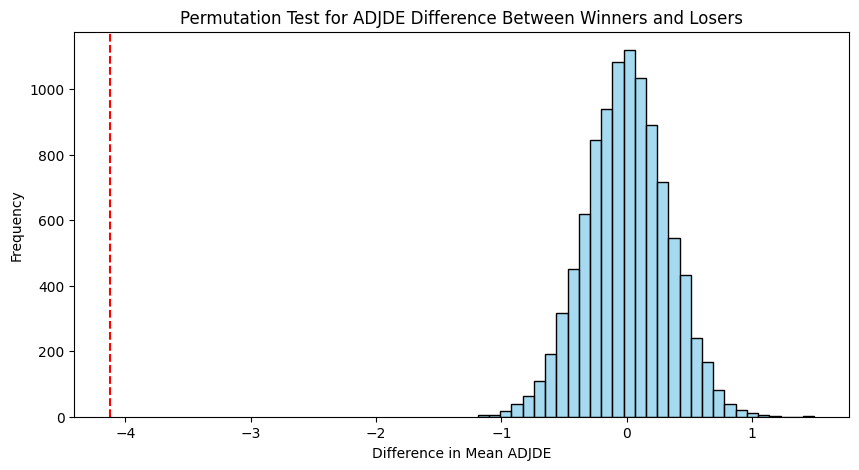

Observed difference in mean ADJDE: -4.1245833333333195
P-value: 0.0


In [64]:
# Separate winners and losers based on 'Is_32' flag
winners_adjde = data[data['Is_32'] == 1]['ADJDE']
losers_adjde = data[data['Is_32'] == 0]['ADJDE']

# Calculate the observed difference in ADJDE
observed_diff_adjde = np.mean(winners_adjde) - np.mean(losers_adjde)

# Combine ADJDE values from both winners and losers for permutation
combined_adjde = pd.concat([winners_adjde, losers_adjde])

# Initialize list to hold permutation differences
perm_diffs_adjde = []

# Perform permutations
n_permutations = 10000
for _ in range(n_permutations):
    # Shuffle the combined ADJDE values
    shuffled_adjde = combined_adjde.sample(frac=1, replace=False).values
    
    # Split the shuffled values into two groups
    shuffled_winners_adjde = shuffled_adjde[:len(winners_adjde)]
    shuffled_losers_adjde = shuffled_adjde[len(winners_adjde):]
    
    # Calculate the difference in mean ADJDE for this permutation
    perm_diff_adjde = np.mean(shuffled_winners_adjde) - np.mean(shuffled_losers_adjde)
    
    # Append the difference to the list
    perm_diffs_adjde.append(perm_diff_adjde)

# Calculate the p-value based on the observed difference
p_value_adjde = (sum(perm_diffs_adjde <= observed_diff_adjde) / n_permutations)

# Plot the results
plt.figure(figsize=(10, 5))
sns.histplot(perm_diffs_adjde, bins=30, kde=False, color='skyblue')
plt.axvline(x=observed_diff_adjde, color='red', linestyle='--')
plt.title('Permutation Test for ADJDE Difference Between Winners and Losers')
plt.xlabel('Difference in Mean ADJDE')
plt.ylabel('Frequency')
plt.show()

# Print observed difference and p-value
print('Observed difference in mean ADJDE:', observed_diff_adjde)
print('P-value:', p_value_adjde)


### Bootstrap EFG%

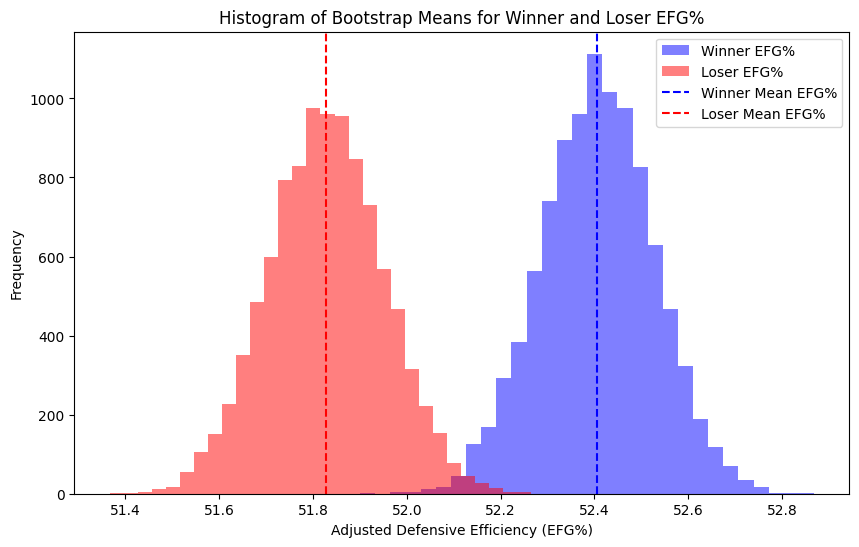

Winner EFG% CI: [52.16875    52.64146354]
Loser EFG% CI: [51.59082812 52.07001042]


In [65]:
winner_means = bootstrap_mean(winner['EFG%'])
loser_means = bootstrap_mean(loser['EFG%'])

# Confidence intervals
winner_ci = np.percentile(winner_means, [2.5, 97.5])
loser_ci = np.percentile(loser_means, [2.5, 97.5])

plt.figure(figsize=(10, 6))
plt.hist(winner_means, bins=30, alpha=0.5, label='Winner EFG%', color='blue')
plt.hist(loser_means, bins=30, alpha=0.5, label='Loser EFG%', color='red')
plt.axvline(np.mean(winner_means), color='blue', linestyle='--', label='Winner Mean EFG%')
plt.axvline(np.mean(loser_means), color='red', linestyle='--', label='Loser Mean EFG%')
plt.title('Histogram of Bootstrap Means for Winner and Loser EFG%')
plt.xlabel('Adjusted Defensive Efficiency (EFG%)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print('Winner EFG% CI:', winner_ci)
print('Loser EFG% CI:', loser_ci)

### Hypothesis Testing EFG%

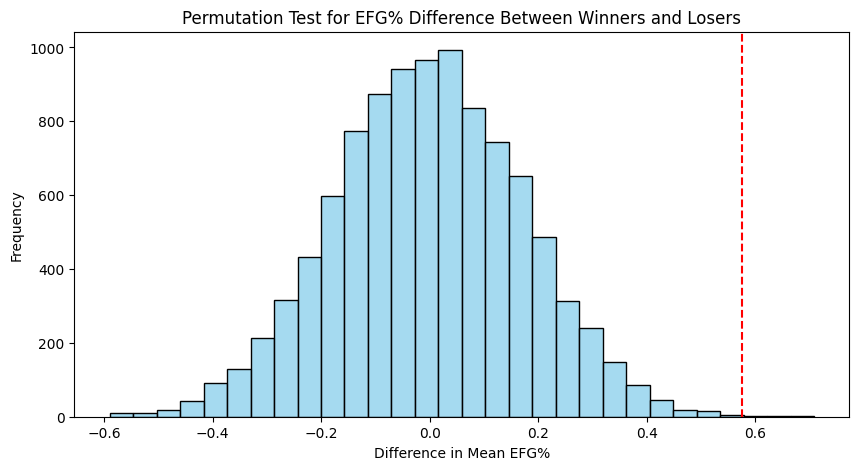

Observed difference in mean EFG%: 0.5762500000000017
P-value: 0.0004


In [66]:
winners = data[data['Is_32'] == 1]['EFG%']
losers = data[data['Is_32'] == 0]['EFG%']

# Calculate the observed difference in EFG%
observed_diff_efg = np.mean(winners) - np.mean(losers)

# Combine EFG% values from both winners and losers for permutation
combined_efg = pd.concat([winners, losers])

# Initialize list to hold permutation differences
perm_diffs_efg = []

# Perform permutations
n_permutations = 10000
for _ in range(n_permutations):
    # Shuffle the combined EFG% values
    shuffled_efg = combined_efg.sample(frac=1, replace=False).values
    
    # Split the shuffled values into two groups
    shuffled_winners = shuffled_efg[:len(winners)]
    shuffled_losers = shuffled_efg[len(winners):]
    
    # Calculate the difference in mean EFG% for this permutation
    perm_diff_efg = np.mean(shuffled_winners) - np.mean(shuffled_losers)
    
    # Append the difference to the list
    perm_diffs_efg.append(perm_diff_efg)

# Calculate the p-value based on the observed difference
p_value_efg = (sum(perm_diffs_efg >= observed_diff_efg) / n_permutations)

# Plot the results
plt.figure(figsize=(10, 5))
sns.histplot(perm_diffs_efg, bins=30, kde=False, color='skyblue')
plt.axvline(x=observed_diff_efg, color='red', linestyle='--')
plt.title('Permutation Test for EFG% Difference Between Winners and Losers')
plt.xlabel('Difference in Mean EFG%')
plt.ylabel('Frequency')
plt.show()

# Print observed difference and p-value
print('Observed difference in mean EFG%:', observed_diff_efg)
print('P-value:', p_value_efg)


### Bootstrap 2P%

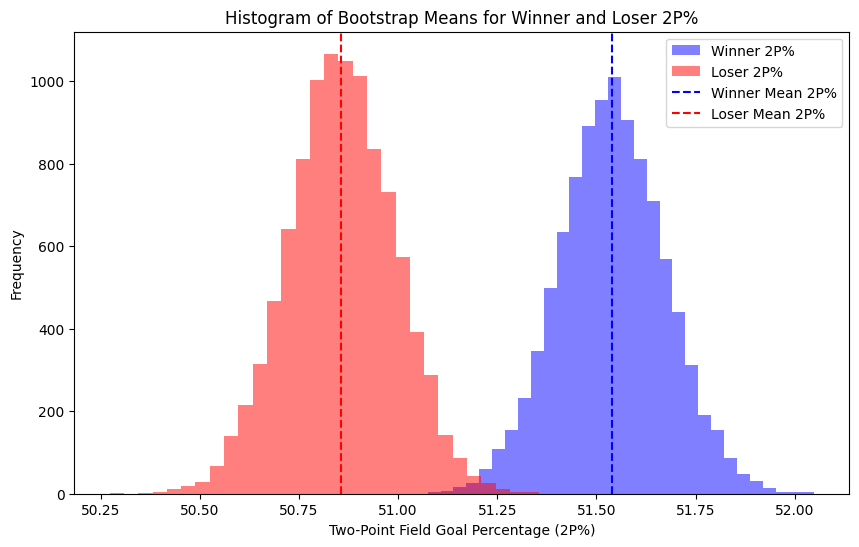

Winner 2P% 95% CI: [51.27707812 51.80459375]
Loser 2P% 95% CI: [50.59229167 51.11688021]


In [67]:
winner_means_2p = bootstrap_mean(winner['2P%'])
loser_means_2p = bootstrap_mean(loser['2P%'])

# Confidence intervals
winner_ci_2p = np.percentile(winner_means_2p, [2.5, 97.5])
loser_ci_2p = np.percentile(loser_means_2p, [2.5, 97.5])

plt.figure(figsize=(10, 6))
plt.hist(winner_means_2p, bins=30, alpha=0.5, label='Winner 2P%', color='blue')
plt.hist(loser_means_2p, bins=30, alpha=0.5, label='Loser 2P%', color='red')
plt.axvline(np.mean(winner_means_2p), color='blue', linestyle='--', label='Winner Mean 2P%')
plt.axvline(np.mean(loser_means_2p), color='red', linestyle='--', label='Loser Mean 2P%')
plt.title('Histogram of Bootstrap Means for Winner and Loser 2P%')
plt.xlabel('Two-Point Field Goal Percentage (2P%)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print('Winner 2P% 95% CI:', winner_ci_2p)
print('Loser 2P% 95% CI:', loser_ci_2p)


### Hypothesis Testing 2P%

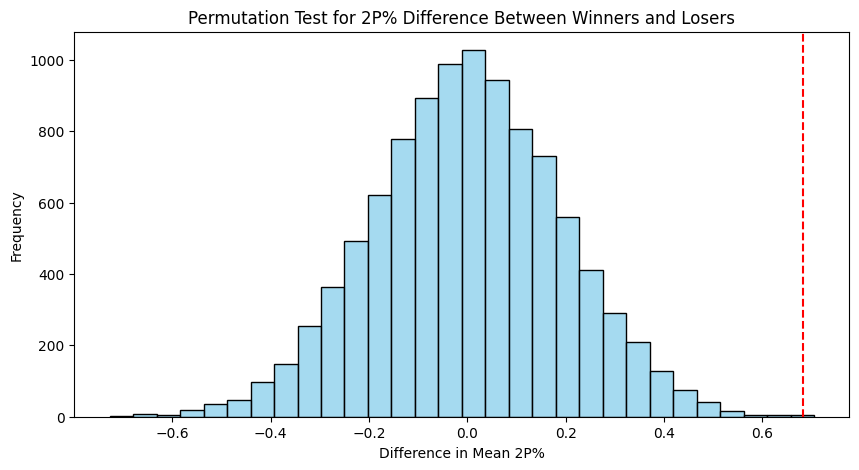

Observed difference in mean 2P%: 0.681874999999998
P-value: 0.0002


In [68]:
# Separate winners and losers based on 'Is_32' flag for 2P%
winners_2p = data[data['Is_32'] == 1]['2P%']
losers_2p = data[data['Is_32'] == 0]['2P%']

# Calculate the observed difference in 2P%
observed_diff_2p = np.mean(winners_2p) - np.mean(losers_2p)

# Combine 2P% values from both winners and losers for permutation
combined_2p = pd.concat([winners_2p, losers_2p])

# Initialize list to hold permutation differences
perm_diffs_2p = []

# Perform permutations
n_permutations = 10000
for _ in range(n_permutations):
    # Shuffle the combined 2P% values
    shuffled_2p = combined_2p.sample(frac=1, replace=False).values
    
    # Split the shuffled values into two groups
    shuffled_winners_2p = shuffled_2p[:len(winners_2p)]
    shuffled_losers_2p = shuffled_2p[len(winners_2p):]
    
    # Calculate the difference in mean 2P% for this permutation
    perm_diff_2p = np.mean(shuffled_winners_2p) - np.mean(shuffled_losers_2p)
    
    # Append the difference to the list
    perm_diffs_2p.append(perm_diff_2p)

# Calculate the p-value based on the observed difference
p_value_2p = (sum(perm_diffs_2p >= observed_diff_2p) / n_permutations)

# Plot the results
plt.figure(figsize=(10, 5))
sns.histplot(perm_diffs_2p, bins=30, kde=False, color='skyblue')
plt.axvline(x=observed_diff_2p, color='red', linestyle='--')
plt.title('Permutation Test for 2P% Difference Between Winners and Losers')
plt.xlabel('Difference in Mean 2P%')
plt.ylabel('Frequency')
plt.show()

# Print observed difference and p-value
print('Observed difference in mean 2P%:', observed_diff_2p)
print('P-value:', p_value_2p)


### Bootstrap 3P%

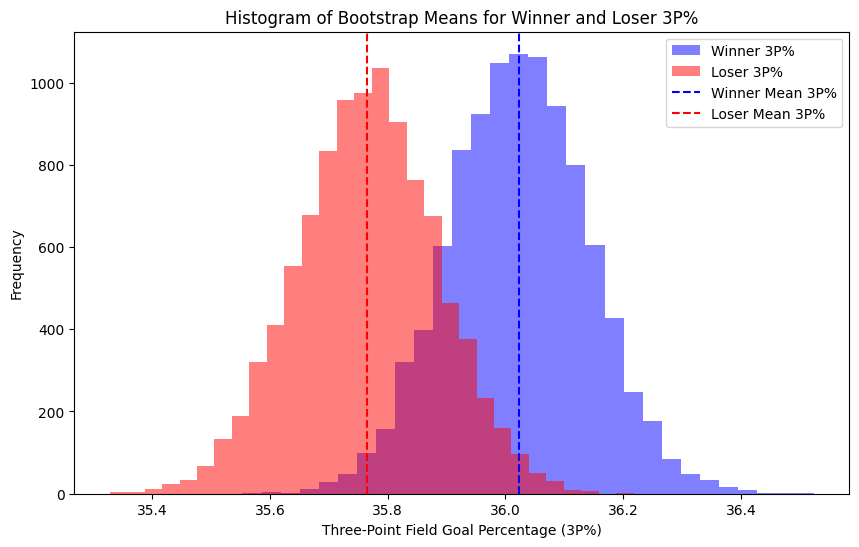

Winner 3P% 95% CI: [35.79458333 36.25417188]
Loser 3P% 95% CI: [35.53144792 35.99667188]


In [69]:
winner_means_3p = bootstrap_mean(winner['3P%'])
loser_means_3p = bootstrap_mean(loser['3P%'])

# Confidence intervals
winner_ci_3p = np.percentile(winner_means_3p, [2.5, 97.5])
loser_ci_3p = np.percentile(loser_means_3p, [2.5, 97.5])

plt.figure(figsize=(10, 6))
plt.hist(winner_means_3p, bins=30, alpha=0.5, label='Winner 3P%', color='blue')
plt.hist(loser_means_3p, bins=30, alpha=0.5, label='Loser 3P%', color='red')
plt.axvline(np.mean(winner_means_3p), color='blue', linestyle='--', label='Winner Mean 3P%')
plt.axvline(np.mean(loser_means_3p), color='red', linestyle='--', label='Loser Mean 3P%')
plt.title('Histogram of Bootstrap Means for Winner and Loser 3P%')
plt.xlabel('Three-Point Field Goal Percentage (3P%)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print('Winner 3P% 95% CI:', winner_ci_3p)
print('Loser 3P% 95% CI:', loser_ci_3p)

### Hypothesis Testing 3P%

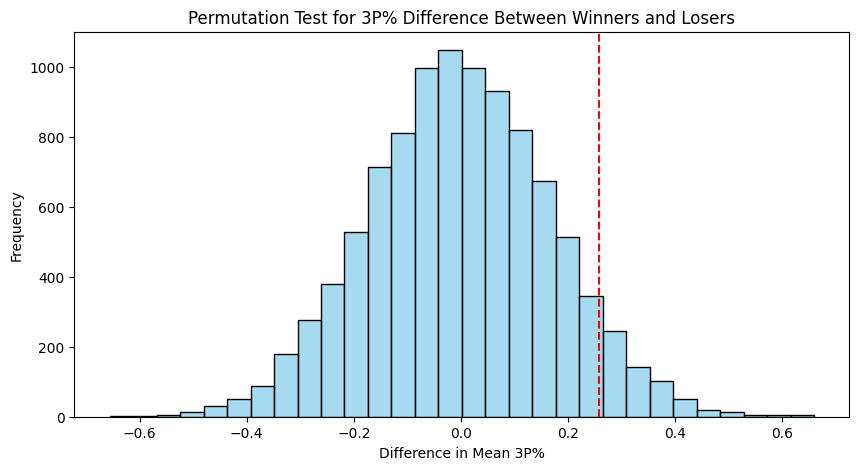

Observed difference in mean 3P%: 0.25833333333333286
P-value: 0.0635


In [70]:
winners_3p = data[data['Is_32'] == 1]['3P%']
losers_3p = data[data['Is_32'] == 0]['3P%']

# Calculate the observed difference in 3P%
observed_diff_3p = np.mean(winners_3p) - np.mean(losers_3p)

# Combine 3P% values from both winners and losers for permutation
combined_3p = pd.concat([winners_3p, losers_3p])

# Initialize list to hold permutation differences
perm_diffs_3p = []

# Perform permutations
n_permutations = 10000
for _ in range(n_permutations):
    # Shuffle the combined 3P% values
    shuffled_3p = combined_3p.sample(frac=1, replace=False).values
    
    # Split the shuffled values into two groups
    shuffled_winners_3p = shuffled_3p[:len(winners_3p)]
    shuffled_losers_3p = shuffled_3p[len(winners_3p):]
    
    # Calculate the difference in mean 3P% for this permutation
    perm_diff_3p = np.mean(shuffled_winners_3p) - np.mean(shuffled_losers_3p)
    
    # Append the difference to the list
    perm_diffs_3p.append(perm_diff_3p)

# Calculate the p-value based on the observed difference
p_value_3p = (sum(perm_diffs_3p >= observed_diff_3p) / n_permutations)

# Plot the results
plt.figure(figsize=(10, 5))
sns.histplot(perm_diffs_3p, bins=30, kde=False, color='skyblue')
plt.axvline(x=observed_diff_3p, color='red', linestyle='--')
plt.title('Permutation Test for 3P% Difference Between Winners and Losers')
plt.xlabel('Difference in Mean 3P%')
plt.ylabel('Frequency')
plt.show()

print('Observed difference in mean 3P%:', observed_diff_3p)
print('P-value:', p_value_3p)


### Bootstrap 3PR

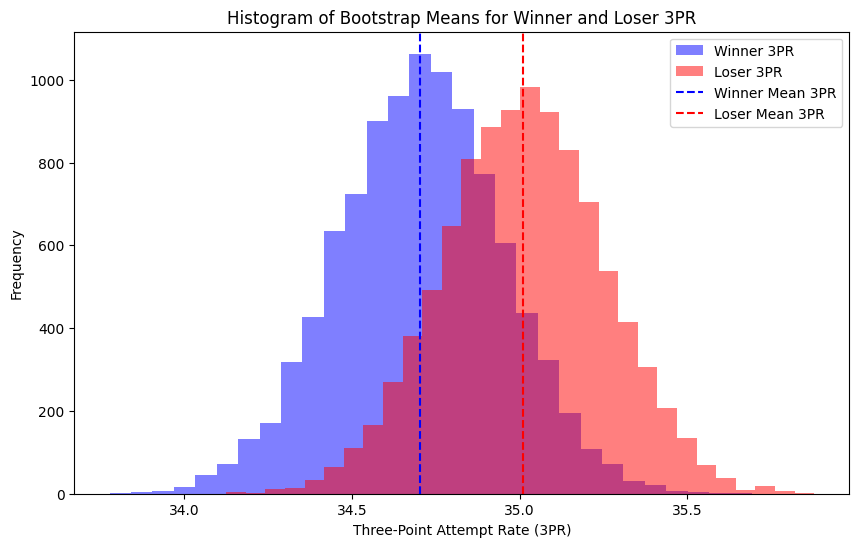

Winner 3PR 95% CI: [34.21291667 35.17980729]
Loser 3PR 95% CI: [34.54       35.47834896]


In [71]:
winner_means_3pr = bootstrap_mean(winner['3PR'])
loser_means_3pr = bootstrap_mean(loser['3PR'])

# Confidence intervals
winner_ci_3pr = np.percentile(winner_means_3pr, [2.5, 97.5])
loser_ci_3pr = np.percentile(loser_means_3pr, [2.5, 97.5])

plt.figure(figsize=(10, 6))
plt.hist(winner_means_3pr, bins=30, alpha=0.5, label='Winner 3PR', color='blue')
plt.hist(loser_means_3pr, bins=30, alpha=0.5, label='Loser 3PR', color='red')
plt.axvline(np.mean(winner_means_3pr), color='blue', linestyle='--', label='Winner Mean 3PR')
plt.axvline(np.mean(loser_means_3pr), color='red', linestyle='--', label='Loser Mean 3PR')
plt.title('Histogram of Bootstrap Means for Winner and Loser 3PR')
plt.xlabel('Three-Point Attempt Rate (3PR)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print('Winner 3PR 95% CI:', winner_ci_3pr)
print('Loser 3PR 95% CI:', loser_ci_3pr)

### Hypothesis Testing 3PR

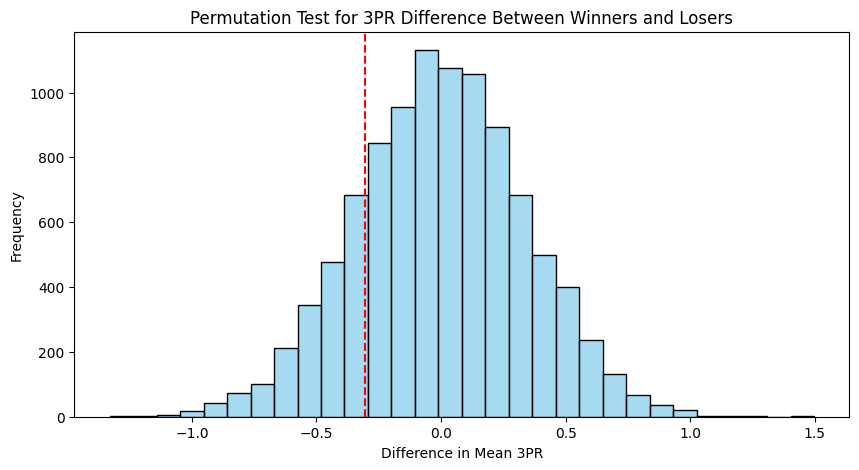

Observed difference in mean 3PR: -0.30562499999999915
P-value: 0.8141


In [72]:
winners_3pr = data[data['Is_32'] == 1]['3PR']
losers_3pr = data[data['Is_32'] == 0]['3PR']

# Calculate the observed difference in 3PR
observed_diff_3pr = np.mean(winners_3pr) - np.mean(losers_3pr)

# Combine 3PR values from both winners and losers for permutation
combined_3pr = pd.concat([winners_3pr, losers_3pr])

# Initialize list to hold permutation differences
perm_diffs_3pr = []

# Perform permutations
n_permutations = 10000
for _ in range(n_permutations):
    # Shuffle the combined 3PR values
    shuffled_3pr = combined_3pr.sample(frac=1, replace=False).values
    
    # Split the shuffled values into two groups
    shuffled_winners_3pr = shuffled_3pr[:len(winners_3pr)]
    shuffled_losers_3pr = shuffled_3pr[len(winners_3pr):]
    
    # Calculate the difference in mean 3PR for this permutation
    perm_diff_3pr = np.mean(shuffled_winners_3pr) - np.mean(shuffled_losers_3pr)
    
    # Append the difference to the list
    perm_diffs_3pr.append(perm_diff_3pr)

# Calculate the p-value based on the observed difference
p_value_3pr = (sum(perm_diffs_3pr >= observed_diff_3pr) / n_permutations)

# Plot the results
plt.figure(figsize=(10, 5))
sns.histplot(perm_diffs_3pr, bins=30, kde=False, color='skyblue')
plt.axvline(x=observed_diff_3pr, color='red', linestyle='--')
plt.title('Permutation Test for 3PR Difference Between Winners and Losers')
plt.xlabel('Difference in Mean 3PR')
plt.ylabel('Frequency')
plt.show()

print('Observed difference in mean 3PR:', observed_diff_3pr)
print('P-value:', p_value_3pr)


### Bootstrap Seed

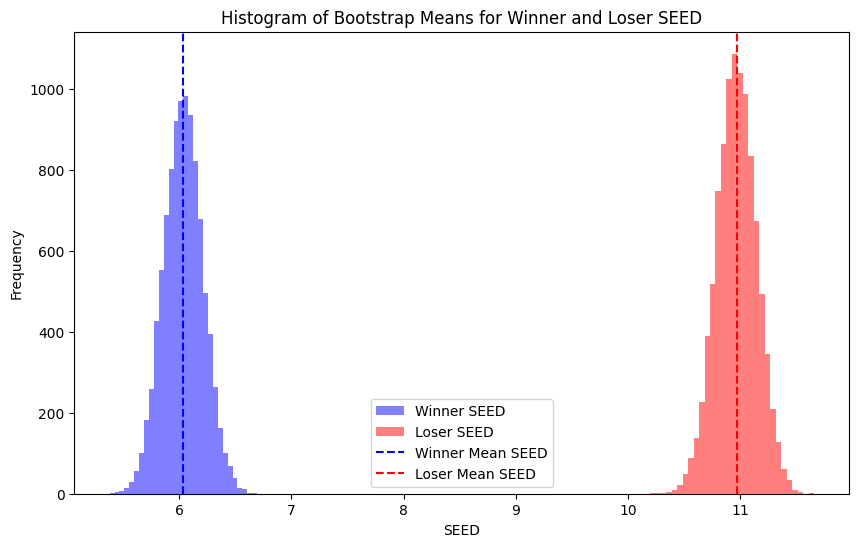

Winner SEED 95% CI: [5.7     6.38125]
Loser SEED 95% CI: [10.61661458 11.31458333]


In [73]:
# Bootstrap means for SEED
winner_means_seed = bootstrap_mean(winner['SEED'])
loser_means_seed = bootstrap_mean(loser['SEED'])

# Confidence intervals
winner_ci_seed = np.percentile(winner_means_seed, [2.5, 97.5])
loser_ci_seed = np.percentile(loser_means_seed, [2.5, 97.5])

plt.figure(figsize=(10, 6))
plt.hist(winner_means_seed, bins=30, alpha=0.5, label='Winner SEED', color='blue')
plt.hist(loser_means_seed, bins=30, alpha=0.5, label='Loser SEED', color='red')
plt.axvline(np.mean(winner_means_seed), color='blue', linestyle='--', label='Winner Mean SEED')
plt.axvline(np.mean(loser_means_seed), color='red', linestyle='--', label='Loser Mean SEED')
plt.title('Histogram of Bootstrap Means for Winner and Loser SEED')
plt.xlabel('SEED')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print('Winner SEED 95% CI:', winner_ci_seed)
print('Loser SEED 95% CI:', loser_ci_seed)

### Hypothesis Testing Seed

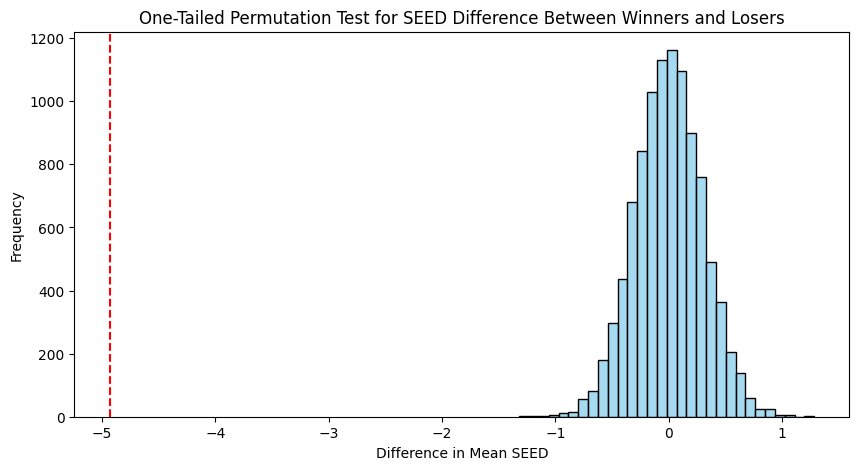

Observed difference in mean SEED: -4.93125
One-tailed p-value (lower seed for winners): 0.0


In [74]:
winners_seed = data[data['Is_32'] == 1]['SEED']
losers_seed = data[data['Is_32'] == 0]['SEED']

# Calculate the observed difference in SEED
observed_diff_seed = np.mean(winners_seed) - np.mean(losers_seed)

# Combine SEED values for permutation
combined_seed = pd.concat([winners_seed, losers_seed])

# Initialize list for permutation differences
perm_diffs_seed = []

# Perform permutations
n_permutations = 10000
for _ in range(n_permutations):
    # Shuffle and split the combined SEED values
    shuffled_seed = combined_seed.sample(frac=1, replace=False).values
    shuffled_winners_seed = shuffled_seed[:len(winners_seed)]
    shuffled_losers_seed = shuffled_seed[len(winners_seed):]
    
    perm_diff_seed = np.mean(shuffled_winners_seed) - np.mean(shuffled_losers_seed)
    perm_diffs_seed.append(perm_diff_seed)

# One-tailed p-value calculation (lower seed is better)
p_value_seed = sum(perm_diffs_seed <= observed_diff_seed) / n_permutations

plt.figure(figsize=(10, 5))
sns.histplot(perm_diffs_seed, bins=30, kde=False, color='skyblue')
plt.axvline(x=observed_diff_seed, color='red', linestyle='--')
plt.title('One-Tailed Permutation Test for SEED Difference Between Winners and Losers')
plt.xlabel('Difference in Mean SEED')
plt.ylabel('Frequency')
plt.show()

print('Observed difference in mean SEED:', observed_diff_seed)
print('One-tailed p-value (lower seed for winners):', p_value_seed)
